In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 29 Lecture 1 Assignment

In this assignment, we will learn about decision trees. We will use the Chicago salary dataset loaded below.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

<IPython.core.display.Javascript object>

In [3]:
chicago = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Current_Employee_Names__Salaries__and_Position_Titles.csv"
)

<IPython.core.display.Javascript object>

In [4]:
chicago.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN
2,"COOPER, JOHN E",LIEUTENANT-EMT,FIRE,F,Salary,NaN,$114324.00,NaN
3,"CRESPO, VILMA I",STAFF ASST,LAW,F,Salary,NaN,$76932.00,NaN
4,"DOLAN, ROBERT J",SERGEANT,POLICE,F,Salary,NaN,$111474.00,NaN


<IPython.core.display.Javascript object>

To simplify this problem, we will limit our model to only salary employees. Create a new dataset that does not contain any hourly employees.

In [5]:
chicago["Salary or Hourly"].unique()

array(['Salary', 'Hourly'], dtype=object)

<IPython.core.display.Javascript object>

In [6]:
# answer below:
chicago = chicago[chicago['Salary or Hourly'] == 'Salary']


<IPython.core.display.Javascript object>

Next, we will look at the count of all values for both job titles and department to ensure that we don't use features that are too sparse in our model.

In [13]:
# answer below:
chicago["Job Titles"].value_counts()

POLICE OFFICER                            9393
FIREFIGHTER-EMT                           1424
SERGEANT                                  1118
POLICE OFFICER (ASSIGNED AS DETECTIVE)     845
FIREFIGHTER                                564
                                          ... 
COORD OF HUMAN RELATIONS                     1
DIRECTOR OF INTERNAL AUDIT                   1
GENERAL FOREMAN OF PLUMBERS                  1
ASST CHIEF PLUMBING INSPECTOR                1
TELECOMMUNICATIONS SPECIALIST                1
Name: Job Titles, Length: 954, dtype: int64

<IPython.core.display.Javascript object>

In [14]:
chicago["Department"].value_counts()

POLICE                   12941
FIRE                      4798
OEMC                       832
PUBLIC LIBRARY             708
AVIATION                   556
FINANCE                    532
HEALTH                     512
TRANSPORTN                 396
WATER MGMNT                366
LAW                        361
CITY COUNCIL               348
FAMILY & SUPPORT           321
STREETS & SAN              321
BUILDINGS                  266
COMMUNITY DEVELOPMENT      210
GENERAL SERVICES           205
BUSINESS AFFAIRS           160
BOARD OF ELECTION          112
DoIT                       101
CITY CLERK                  82
PROCUREMENT                 82
MAYOR'S OFFICE              78
HUMAN RESOURCES             67
CULTURAL AFFAIRS            66
INSPECTOR GEN               63
ANIMAL CONTRL               57
IPRA                        56
BUDGET & MGMT               43
ADMIN HEARNG                38
DISABILITIES                29
TREASURER                   23
COPA                        17
HUMAN RE

<IPython.core.display.Javascript object>

Choose the between department and job title and use the variable with the smallest number of values to for one hot encoding. Additionally, create dummy variables for full or part-time.

In [25]:
# answer below:
department_counts = chicago["Department"].value_counts()
keep = department_counts[department_counts > 10].index
chicago = chicago[chicago["Department"].isin(keep)]

<IPython.core.display.Javascript object>

In [26]:
chicago = pd.concat(
    [chicago, pd.get_dummies(chicago["Department"], drop_first=True)], axis=1
)
chicago.head(2)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,ANIMAL CONTRL,AVIATION,...,LAW,MAYOR'S OFFICE,OEMC,POLICE,PROCUREMENT,PUBLIC LIBRARY,STREETS & SAN,TRANSPORTN,TREASURER,WATER MGMNT
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN,0,0,...,0,0,0,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [27]:
chicago = pd.concat(
    [chicago, pd.get_dummies(chicago["Full or Part-Time"], drop_first=True)], axis=1
)
chicago.head(2)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,ANIMAL CONTRL,AVIATION,...,MAYOR'S OFFICE,OEMC,POLICE,PROCUREMENT,PUBLIC LIBRARY,STREETS & SAN,TRANSPORTN,TREASURER,WATER MGMNT,P
0,"ALLISON, PAUL W",LIEUTENANT,FIRE,F,Salary,NaN,$107790.00,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BRUNO, KEVIN D",SERGEANT,POLICE,F,Salary,NaN,$104628.00,NaN,0,0,...,0,0,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

Remove all irrelevant columns (Name, Job Titles, Salary or Hourly, Typical Hours, Hourly Rate)

In [28]:
# answer below:
chicago = chicago.drop(columns = ['Name','Job Titles','Salary or Hourly','Typical Hours','Hourly Rate', 'Department','Full or Part-Time'])


<IPython.core.display.Javascript object>

In [29]:
chicago.head(2)

,Annual Salary,ANIMAL CONTRL,AVIATION,BOARD OF ELECTION,BUDGET & MGMT,BUILDINGS,BUSINESS AFFAIRS,CITY CLERK,CITY COUNCIL,COMMUNITY DEVELOPMENT,...,MAYOR'S OFFICE,OEMC,POLICE,PROCUREMENT,PUBLIC LIBRARY,STREETS & SAN,TRANSPORTN,TREASURER,WATER MGMNT,P
0,$107790.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,$104628.00,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

Check that none of the remaining columns are of object type and convert them to numeric if they are of object type.

In [30]:
# answer below:
chicago.dtypes


Annual Salary            object
ANIMAL CONTRL             uint8
AVIATION                  uint8
BOARD OF ELECTION         uint8
BUDGET & MGMT             uint8
BUILDINGS                 uint8
BUSINESS AFFAIRS          uint8
CITY CLERK                uint8
CITY COUNCIL              uint8
COMMUNITY DEVELOPMENT     uint8
COPA                      uint8
CULTURAL AFFAIRS          uint8
DISABILITIES              uint8
DoIT                      uint8
FAMILY & SUPPORT          uint8
FINANCE                   uint8
FIRE                      uint8
GENERAL SERVICES          uint8
HEALTH                    uint8
HUMAN RELATIONS           uint8
HUMAN RESOURCES           uint8
INSPECTOR GEN             uint8
IPRA                      uint8
LAW                       uint8
MAYOR'S OFFICE            uint8
OEMC                      uint8
POLICE                    uint8
PROCUREMENT               uint8
PUBLIC LIBRARY            uint8
STREETS & SAN             uint8
TRANSPORTN                uint8
TREASURE

<IPython.core.display.Javascript object>

In [31]:
chicago["Annual Salary"] = chicago["Annual Salary"].str.replace("$", "")

<IPython.core.display.Javascript object>

In [33]:
chicago["Annual Salary"] = pd.to_numeric(chicago["Annual Salary"])

<IPython.core.display.Javascript object>

Split the data into a test and train sample. Use annual salary as the dependent variable. 20% of the data should be assigned to the test sample.

In [36]:
# answer below:
X = chicago.drop(columns=["Annual Salary"])
y = chicago["Annual Salary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=27
)

<IPython.core.display.Javascript object>

Generate a regession decision tree using `DecisionTreeRegressor` in sklearn. Fit the model on the training set and calculate the score for both train and test.

In [45]:
# answer below:
model = DecisionTreeRegressor(max_leaf_nodes=50)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=50,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

<IPython.core.display.Javascript object>

In [46]:
model.score(X_train, y_train)

0.14347543163261245

<IPython.core.display.Javascript object>

In [47]:
model.score(X_test, y_test)

0.1580560945653967

<IPython.core.display.Javascript object>

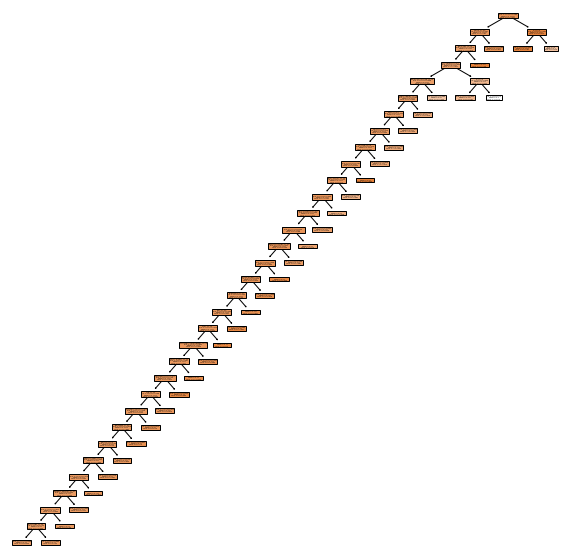

Wall time: 1.52 s


<IPython.core.display.Javascript object>

In [41]:
%%time
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()